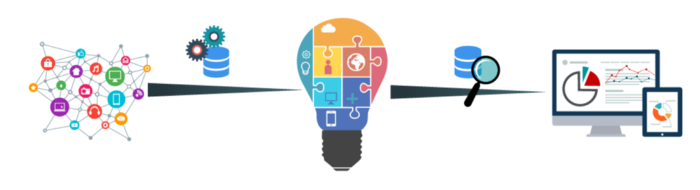
## <font color='blue'>Engenharia de Atributos em Dados Criminais</font>
- Engenharia de Dados

A engenharia de atributos é uma técnica de análise de dados que aproveita os dados para criar novas variáveis que não estão no conjunto de dados original. 
Permite produzir novos recursos para a análise de dados, com o objetivo de simplificar e acelerar as transformações de dados. 

- Objetivo

Este conjunto de dados reais reflete incidentes de crimes na cidade de Los Angeles desde 2020 à julho/2023. 
O intuito da pesquisa é explorar os dados e obter informações valiosas para a sociedade e empresas.




### Instalando os Pacotes e Carregando os Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignore Warning = avisos de desenvolvedores
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

### Análise Exploratória de Dados

In [4]:
df.shape

(775342, 28)

In [5]:
# Aumentar a quantidade de colunas a serem visualizadas na plataforma
pd.set_option("display.max_columns", 30)

In [6]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775342 entries, 0 to 775341
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           775342 non-null  int64  
 1   Date Rptd       775342 non-null  object 
 2   DATE OCC        775342 non-null  object 
 3   TIME OCC        775342 non-null  int64  
 4   AREA            775342 non-null  int64  
 5   AREA NAME       775342 non-null  object 
 6   Rpt Dist No     775342 non-null  int64  
 7   Part 1-2        775342 non-null  int64  
 8   Crm Cd          775342 non-null  int64  
 9   Crm Cd Desc     775342 non-null  object 
 10  Mocodes         668849 non-null  object 
 11  Vict Age        775342 non-null  int64  
 12  Vict Sex        673983 non-null  object 
 13  Vict Descent    673975 non-null  object 
 14  Premis Cd       775333 non-null  float64
 15  Premis Desc     774886 non-null  object 
 16  Weapon Used Cd  269564 non-null  float64
 17  Weapon Des

In [8]:
df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           106493
Vict Age               0
Vict Sex          101359
Vict Descent      101367
Premis Cd              9
Premis Desc          456
Weapon Used Cd    505778
Weapon Desc       505778
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          718111
Crm Cd 3          773434
Crm Cd 4          775285
LOCATION               0
Cross Street      650919
LAT                    0
LON                    0
dtype: int64

### Limpeza de Valores Ausentes

In [9]:
# Verificar percentual de valores ausentes no Dataset
def percent_valores_ausentes(df):
    totalCells = np.prod(df.shape)
    missingCount = df.isnull().sum()
    totalMissing = missingCount.sum()
    print('O dataset possui', round(((totalMissing/totalCells)*100),2), '% de valores ausentes')
    
percent_valores_ausentes(df)

O dataset possui 19.53 % de valores ausentes


In [10]:
#Verificando percentual por colunas com maiores valores ausentes
def calcular_porcentagem_nulos(df, coluna):
    porcentagem_nulos = df[coluna].isnull().mean() * 100
    return porcentagem_nulos

calcular_porcentagem_nulos(df, 'Mocodes')

13.734971148215886

In [11]:
calcular_porcentagem_nulos(df, 'Vict Sex')

13.072811739851575

In [12]:
calcular_porcentagem_nulos(df, 'Vict Descent')

13.073843542591526

In [13]:
calcular_porcentagem_nulos(df, 'Weapon Used Cd')

65.23289077594146

In [14]:
calcular_porcentagem_nulos(df, 'Weapon Desc')

65.23289077594146

In [15]:
calcular_porcentagem_nulos(df, 'Crm Cd 2')

92.61861217372463

In [16]:
calcular_porcentagem_nulos(df, 'Crm Cd 3')

99.7539150465214

In [17]:
calcular_porcentagem_nulos(df, 'Crm Cd 4')

99.99264840547784

In [18]:
calcular_porcentagem_nulos(df, 'Cross Street')

83.9525009608663

Após analisar a porcentagem das colunas acima, decidi excluir colunas com valores acima de 30% de ausência pois não há dados suficientes para análises e seriam desnecessárias para essa análise.

In [19]:
#Aplicando Drop nas colunas com alto percentual de valores ausentes
newdf= df.drop(columns =['Cross Street','Crm Cd 4', 'Crm Cd 3', 'Crm Cd 2', 'Weapon Desc', 'Weapon Used Cd'])

In [20]:
#Verificando a nova porcentagem de dados ausentes 
percent_valores_ausentes(newdf)

O dataset possui 1.82 % de valores ausentes


In [21]:
# Como os valores de ausência são baixos, irei excluir as linhas ausentes
newdf = newdf.dropna()

In [22]:
percent_valores_ausentes(newdf)

O dataset possui 0.0 % de valores ausentes


In [23]:
newdf

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775337,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",1300 0329,23,M,H,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,12500 BRANFORD ST,34.2466,-118.4054
775338,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
775339,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
775340,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,1822 0344,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485


In [24]:
# Verificando valores únicos
for col in list(newdf.columns):
    lista_valores_unicos = newdf[col].unique()
    if len(lista_valores_unicos) <15:
        print("\n")
        print(col + ': ' + str(len(lista_valores_unicos)) + ' valores únicos')
        print(lista_valores_unicos)
    else:
        print("\n")
        print(col + ': ' + str(len(lista_valores_unicos))+ ' valores únicos')



DR_NO: 668038 valores únicos


Date Rptd: 1315 valores únicos


DATE OCC: 1315 valores únicos


TIME OCC: 1439 valores únicos


AREA: 21 valores únicos


AREA NAME: 21 valores únicos


Rpt Dist No: 1191 valores únicos


Part 1-2: 2 valores únicos
[2 1]


Crm Cd: 137 valores únicos


Crm Cd Desc: 137 valores únicos


Mocodes: 259729 valores únicos


Vict Age: 102 valores únicos


Vict Sex: 5 valores únicos
['F' 'M' 'X' 'H' '-']


Vict Descent: 20 valores únicos


Premis Cd: 306 valores únicos


Premis Desc: 305 valores únicos


Status: 6 valores únicos
['AO' 'IC' 'AA' 'JA' 'JO' 'CC']


Status Desc: 6 valores únicos
['Adult Other' 'Invest Cont' 'Adult Arrest' 'Juv Arrest' 'Juv Other' 'UNK']


Crm Cd 1: 138 valores únicos


LOCATION: 59834 valores únicos


LAT: 5347 valores únicos


LON: 4954 valores únicos


In [25]:
newdf.isin(['-']).sum() 

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        1
Vict Descent    2
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [26]:
newdf.isin(['UNK']).sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     3
Crm Cd 1        0
LOCATION        1
LAT             0
LON             0
dtype: int64

Como a quantidade de valores únicos '-' e 'UNK' indentificados como valores ausentes de informação são muito baixos, decidi deletá-los pois não irão impactar na análise. 

In [27]:
newdf = newdf[newdf['Status Desc'] != 'UNK'] #Mantêm as linhas que não forem iguais a 'UNK'
newdf = newdf[newdf['LOCATION'] != 'UNK']
newdf = newdf[newdf['Vict Sex'] != '-']
newdf = newdf[newdf['Vict Descent'] != '-']

In [28]:
#Chegando as colunas com valor '-'
newdf.isin(['-']).any()

DR_NO           False
Date Rptd       False
DATE OCC        False
TIME OCC        False
AREA            False
AREA NAME       False
Rpt Dist No     False
Part 1-2        False
Crm Cd          False
Crm Cd Desc     False
Mocodes         False
Vict Age        False
Vict Sex        False
Vict Descent    False
Premis Cd       False
Premis Desc     False
Status          False
Status Desc     False
Crm Cd 1        False
LOCATION        False
LAT             False
LON             False
dtype: bool

In [29]:
#Checando as colunas com valor 'UNK'
newdf.isin(['UNK']).any()

DR_NO           False
Date Rptd       False
DATE OCC        False
TIME OCC        False
AREA            False
AREA NAME       False
Rpt Dist No     False
Part 1-2        False
Crm Cd          False
Crm Cd Desc     False
Mocodes         False
Vict Age        False
Vict Sex        False
Vict Descent    False
Premis Cd       False
Premis Desc     False
Status          False
Status Desc     False
Crm Cd 1        False
LOCATION        False
LAT             False
LON             False
dtype: bool

In [30]:
newdf.shape

(668032, 22)

In [31]:
# Conferindo a alteração
newdf.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468


### Engenharia de Atributos/ Transformação de Dados

- Variáveis DATE OCC e Date Rptd

In [32]:
newdf['DATE OCC']

0         01/08/2020 12:00:00 AM
1         01/01/2020 12:00:00 AM
2         02/13/2020 12:00:00 AM
3         01/01/2020 12:00:00 AM
4         01/01/2020 12:00:00 AM
                   ...          
775337    01/26/2023 12:00:00 AM
775338    03/22/2023 12:00:00 AM
775339    04/12/2023 12:00:00 AM
775340    07/01/2023 12:00:00 AM
775341    03/05/2023 12:00:00 AM
Name: DATE OCC, Length: 668032, dtype: object

In [33]:
newdf['Date Rptd']

0         01/08/2020 12:00:00 AM
1         01/02/2020 12:00:00 AM
2         04/14/2020 12:00:00 AM
3         01/01/2020 12:00:00 AM
4         01/01/2020 12:00:00 AM
                   ...          
775337    01/27/2023 12:00:00 AM
775338    03/22/2023 12:00:00 AM
775339    04/12/2023 12:00:00 AM
775340    07/02/2023 12:00:00 AM
775341    03/05/2023 12:00:00 AM
Name: Date Rptd, Length: 668032, dtype: object

A variável 'DATE OCC' possui a data da ocorrência do crime, já a variável 'Date Rptd' possui a data em que a ocorrência foi reportada. Ambas as variávels possuem o mesmo dado de horas "12:00 AM" como padrão, nesse caso irei retirar a informação de horas e deixar somente as datas, uma vez que a descrição de hora está presente na variável "TIME OCC" que será tratada em seguida. 

In [34]:
# Editando as variáveis
newdf['DATE OCC']= newdf['DATE OCC'].str.split('12:00:00 AM').str[0]
newdf['Date Rptd']= newdf['Date Rptd'].str.split('12:00:00 AM').str[0]

In [35]:
# Verificando os valores alterados da coluna DATE OCC
newdf['DATE OCC']

0         01/08/2020 
1         01/01/2020 
2         02/13/2020 
3         01/01/2020 
4         01/01/2020 
             ...     
775337    01/26/2023 
775338    03/22/2023 
775339    04/12/2023 
775340    07/01/2023 
775341    03/05/2023 
Name: DATE OCC, Length: 668032, dtype: object

In [36]:
# Verificando os valores alterados da coluna Date Rptd
newdf['Date Rptd']

0         01/08/2020 
1         01/02/2020 
2         04/14/2020 
3         01/01/2020 
4         01/01/2020 
             ...     
775337    01/27/2023 
775338    03/22/2023 
775339    04/12/2023 
775340    07/02/2023 
775341    03/05/2023 
Name: Date Rptd, Length: 668032, dtype: object

Ainda sobre a variável 'DATE OCC' irei extrair o dado de ano e criar uma nova coluna com essa informação. 

In [37]:
# Extraindo o dado do ano
newdf['YEAR OCC']= newdf['DATE OCC'].str.split('/').str[2]

In [38]:
# Conferindo a coluna 
newdf['YEAR OCC'].head()

0    2020 
1    2020 
2    2020 
3    2020 
4    2020 
Name: YEAR OCC, dtype: object

- Variável TIME OCC

A variável 'TIME OCC' está sem formatação, por isso será criada uma função para acrescentar o sinal separador ' : ', para melhor visualização dos dados.  

In [39]:
def formatar_horario(hora):
    hora_str = str(hora)
    if len(hora_str) == 3:
        return hora_str[0] + ':' + hora_str[1:]
    elif len(hora_str) == 4:
        return hora_str[:2] + ':' + hora_str[2:]
    elif len(hora_str) == 1:
        return hora_str[0] + ':00'
    else:
        return hora_str

In [40]:
newdf['TIME OCC']= df['TIME OCC'].apply(formatar_horario)

In [41]:
#Conferindo os dados 
newdf['TIME OCC'] 

0         22:30
1          3:30
2         12:00
3         17:30
4          4:15
          ...  
775337    18:00
775338    10:00
775339    16:30
775340     1:00
775341     9:00
Name: TIME OCC, Length: 668032, dtype: object

Abaixo será criada uma função para categorização da variável 'TIME OCC' para criação de uma nova coluna com os dados do período do dia na qual ocorreu o crime. 

In [42]:
def definir_periodo(periodo):

    periodo_dia = int(periodo.split(':')[0])
    if periodo_dia >= 0 and periodo_dia <= 4:
        return 'Madrugada'
    elif periodo_dia > 4 and periodo_dia <= 12:
        return 'Manhã'
    elif periodo_dia >= 13 and periodo_dia <= 18:
        return 'Tarde'
    elif periodo_dia >= 19 and periodo_dia <= 23:
        return 'Noite'
    else:
        return periodo

In [43]:
# Criada a coluna PERIOD OCC com os dados da categorização
newdf['PERIOD OCC'] = newdf['TIME OCC'].apply(definir_periodo)

In [44]:
# Verificando os valores únicos 
newdf['PERIOD OCC'].unique()

array(['Noite', 'Madrugada', 'Manhã', 'Tarde', '30', '40', '55', '35',
       '45', '25', '50', '52', '39', '36', '44', '42', '28', '57', '24',
       '49', '47', '37', '51', '43', '58', '32', '26', '38', '34', '54',
       '33', '41', '56', '53', '27', '48', '29', '31', '59', '46'],
      dtype=object)

In [45]:
newdf['PERIOD OCC'].min()

'24'

In [46]:
# Filtrando somente os valores com informações válidas na coluna
valid_periods = ['Noite', 'Madrugada', 'Manhã', 'Tarde']
newdf = newdf[newdf['PERIOD OCC'].isin(valid_periods)]

In [47]:
newdf['PERIOD OCC'].value_counts()

Tarde        212940
Manhã        204061
Noite        162799
Madrugada     78970
Name: PERIOD OCC, dtype: int64

In [48]:
# Conferindo as transformações 
newdf.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,YEAR OCC,PERIOD OCC
0,10304468,01/08/2020,01/08/2020,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,Noite
1,190101086,01/02/2020,01/01/2020,3:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,Madrugada
2,200110444,04/14/2020,02/13/2020,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,Manhã
3,191501505,01/01/2020,01/01/2020,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,Tarde
4,191921269,01/01/2020,01/01/2020,4:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,Madrugada


- Variável Vict Age

A variável 'Vict Age' possui valores negativos que serão excluidos (-3, -2, -1). Além disso, a variável possui 87091 registros com valor '0', por ser um valor expressivo, decidi substituir o valor como "uniformed".  Em seguida será criada uma coluna com a faixa etária para melhor visualização dos dados.

In [49]:
# Verificando a média de idades na coluna 
newdf['Vict Age'].mean()

34.460453572567054

In [50]:
# Verificando os valores únicos da coluna 
newdf['Vict Age'].unique()

array([36, 25,  0, 76, 31, 23, 29, 35, 41, 24, 34, 46, 66, 40, 27, 62, 43,
       71, 50, 19, 51, 33, 69, 39, 57, 78, 52, 38, 55, 44, 18, 54, 22, 28,
       42, 56, 67, 37, 60, 61, 59, 32, 30, 45, 20, 15, 58, 47, 26, 21, 64,
       75, 12, 49, 68, 48, 14, 13, 10, 53, 74, 17, 65, 63,  8, 16, 72, 70,
        9, 90, 85, 81, 79, 94, 73, 11, 80,  5, 82,  2, 77, 84, 88, 96, 99,
       86,  7, 92,  3, 83, 87,  6, -1, 89,  4, 93, 98, 91, 95, -2, 97, -3],
      dtype=int64)

In [51]:
# Verificando a quantidade dos valores distintos em ordem
newdf.groupby('Vict Age').size()

Vict Age
-3         1
-2        12
-1        49
 0     85840
 2       334
       ...  
 95       73
 96       77
 97       56
 98       58
 99      279
Length: 102, dtype: int64

In [52]:
# Valor máximo da coluna 
newdf['Vict Age'].max()

99

In [53]:
# Valor mínimo da coluna 
newdf['Vict Age'].min()

-3

In [54]:
# Excluindo os valores (-1, -2, -3)
newdf = newdf[newdf['Vict Age'] != -1]
newdf = newdf[newdf['Vict Age'] != -2]
newdf = newdf[newdf['Vict Age'] != -3]

In [55]:
# Conferindo a exclusão
newdf.groupby('Vict Age').size()

Vict Age
0     85840
2       334
3       383
4       406
5       455
      ...  
95       73
96       77
97       56
98       58
99      279
Length: 99, dtype: int64

In [56]:
# Substituindo os valores de '0' para 'uniformed'
newdf.loc[newdf['Vict Age'] == 0, 'Vict Age'] = 'uniformed'

In [57]:
# Conferindo a substituição 
newdf.groupby('Vict Age').size()

Vict Age
2              334
3              383
4              406
5              455
6              451
             ...  
96              77
97              56
98              58
99             279
uniformed    85840
Length: 99, dtype: int64

In [58]:
# Criando coluna com faixa etária 
def faixa_etaria(idade):
    if idade == 'uniformed':
        return 'uniformed'
    
    idade = int(idade)
    if idade > 0 and idade <= 20:
        return '[0-20]'
    elif idade > 20 and idade <= 40:
        return '[20-40]'
    elif idade > 40 and idade <= 60:
        return '[40-60]'
    elif idade > 60 and idade <= 99:
        return '[60-99]'
    else:
        return idade

In [59]:
# Criando uma nova coluna com as faixas etárias 
newdf['Age Group'] = newdf['Vict Age'].apply(faixa_etaria)

In [60]:
# Conferindo a nova coluna 
newdf.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,YEAR OCC,PERIOD OCC,Age Group
0,10304468,01/08/2020,01/08/2020,22:30,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,Noite,[20-40]
1,190101086,01/02/2020,01/01/2020,3:30,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,Madrugada,[20-40]
2,200110444,04/14/2020,02/13/2020,12:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,uniformed,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,Manhã,uniformed
3,191501505,01/01/2020,01/01/2020,17:30,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,Tarde,[60-99]
4,191921269,01/01/2020,01/01/2020,4:15,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,Madrugada,[20-40]


- Deleção das Variáveis: DR_NO; Rpt Dist No; Part 1-2; Mocodes

Nessa análise não será necessário as seguintes colunas, pois são colunas sem descrição bem definida no dataset, então elas serão excluidas a seguir: DR_NO; Rpt Dist No; Part 1-2; Mocodes.

In [61]:
newdf = newdf.drop(columns = ['DR_NO', 'Rpt Dist No', 'Part 1-2', 'Mocodes'])

In [62]:
# Conferindo a exclusão das colunas
newdf.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,YEAR OCC,PERIOD OCC,Age Group
0,01/08/2020,01/08/2020,22:30,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,Noite,[20-40]
1,01/02/2020,01/01/2020,3:30,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,Madrugada,[20-40]
2,04/14/2020,02/13/2020,12:00,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,uniformed,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,Manhã,uniformed
3,01/01/2020,01/01/2020,17:30,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,Tarde,[60-99]
4,01/01/2020,01/01/2020,4:15,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,Madrugada,[20-40]


In [63]:
newdf.shape

(658708, 21)

- Variável Vict Sex

Em relação à variável 'Vict Sex' há valores como F- Female, M- Male, X- Unknown e H- ?, na biblioteca das varíaveis (como visto abaixo) não há nenhuma menção sobre o valor 'H', por esse motivo - e por ter poucos registros - decidi excluí-lo para melhor análise da variável. 
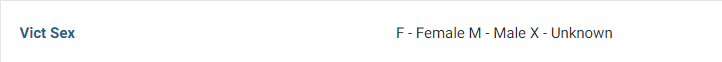

In [64]:
# Visualizando os valores da variável 
newdf.groupby('Vict Sex').size()

Vict Sex
F    279653
H        85
M    314005
X     64965
dtype: int64

In [65]:
# Excluindo os valores iguais a 'H'
newdf = newdf[newdf['Vict Sex'] != 'H']

In [66]:
# Substituindo o valor de 'X' por 'Unknown'
newdf.loc[newdf['Vict Sex'] == 'X', 'Vict Sex'] = 'Unknown'

In [67]:
# Conferindo a exclusão e substituição
newdf.groupby('Vict Sex').size()

Vict Sex
F          279653
M          314005
Unknown     64965
dtype: int64

- Variável Vict Descent

A variável 'Vict Descent' possui letras para representar a Descendência das vitimas, para melhor interpretação dos dados irei substituir as letras pelo nome das categorias, conforme a biblioteca original dos dados.
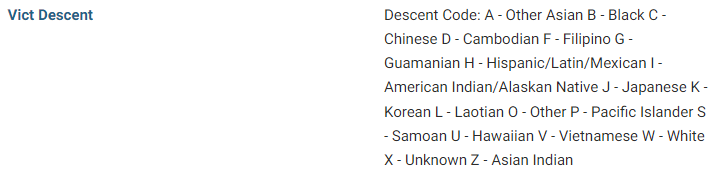

In [68]:
# Visualizando os dados
newdf.groupby('Vict Descent').size()

Vict Descent
A     16644
B    108486
C      2871
D        54
F      3109
G        50
H    232432
I       730
J      1061
K      4071
L        47
O     60022
P       201
S        41
U       136
V       768
W    155657
X     71861
Z       382
dtype: int64

In [69]:
newdf.loc[newdf['Vict Descent'] == 'A', 'Vict Descent'] = 'Other Asian '
newdf.loc[newdf['Vict Descent'] == 'B', 'Vict Descent'] = 'Black '
newdf.loc[newdf['Vict Descent'] == 'C', 'Vict Descent'] = 'Chinese'
newdf.loc[newdf['Vict Descent'] == 'D', 'Vict Descent'] = 'Cambodian'
newdf.loc[newdf['Vict Descent'] == 'F', 'Vict Descent'] = 'Filipino'
newdf.loc[newdf['Vict Descent'] == 'G', 'Vict Descent'] = 'Guamanian'
newdf.loc[newdf['Vict Descent'] == 'H', 'Vict Descent'] = 'Hispanic/Latin/Mexican'
newdf.loc[newdf['Vict Descent'] == 'I', 'Vict Descent'] = 'American Indian/Alaskan Native'
newdf.loc[newdf['Vict Descent'] == 'J', 'Vict Descent'] = 'Japanese'
newdf.loc[newdf['Vict Descent'] == 'K', 'Vict Descent'] = 'Korean'
newdf.loc[newdf['Vict Descent'] == 'L', 'Vict Descent'] = 'Laotian'
newdf.loc[newdf['Vict Descent'] == 'O', 'Vict Descent'] = 'Other'
newdf.loc[newdf['Vict Descent'] == 'P', 'Vict Descent'] = 'Pacific Islander'
newdf.loc[newdf['Vict Descent'] == 'S', 'Vict Descent'] = 'Samoan'
newdf.loc[newdf['Vict Descent'] == 'U', 'Vict Descent'] = 'Hawaiian'
newdf.loc[newdf['Vict Descent'] == 'V', 'Vict Descent'] = 'Vietnamese'
newdf.loc[newdf['Vict Descent'] == 'W', 'Vict Descent'] = 'White'
newdf.loc[newdf['Vict Descent'] == 'X', 'Vict Descent'] = 'Unknown'
newdf.loc[newdf['Vict Descent'] == 'Z', 'Vict Descent'] = 'Asian Indian'

In [70]:
# Conferindo as alterações
newdf.groupby('Vict Descent').size()

Vict Descent
American Indian/Alaskan Native       730
Asian Indian                         382
Black                             108486
Cambodian                             54
Chinese                             2871
Filipino                            3109
Guamanian                             50
Hawaiian                             136
Hispanic/Latin/Mexican            232432
Japanese                            1061
Korean                              4071
Laotian                               47
Other                              60022
Other Asian                        16644
Pacific Islander                     201
Samoan                                41
Unknown                            71861
Vietnamese                           768
White                             155657
dtype: int64

In [71]:
# Salvando o dataset para criação de dashboard 
#newdf.to_csv('dados/engenharia_atributos.csv')

## 🔎 Análise dos Dados gerados após Engenharia de Atributos

In [72]:
newdf.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,YEAR OCC,PERIOD OCC,Age Group
0,01/08/2020,01/08/2020,22:30,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,Black,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,Noite,[20-40]
1,01/02/2020,01/01/2020,3:30,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,Hispanic/Latin/Mexican,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,Madrugada,[20-40]
2,04/14/2020,02/13/2020,12:00,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,uniformed,Unknown,Unknown,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,Manhã,uniformed
3,01/01/2020,01/01/2020,17:30,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,White,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,Tarde,[60-99]
4,01/01/2020,01/01/2020,4:15,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,Unknown,Unknown,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,Madrugada,[20-40]


###   🔸Ano com Maior Número de Ocorrências Registradas

In [73]:
newdf['YEAR OCC'].unique()

array(['2020 ', '2021 ', '2023 ', '2022 '], dtype=object)

In [74]:
newdf['YEAR OCC'].mode()

0    2022 
Name: YEAR OCC, dtype: object

In [75]:
newdf['DATE OCC'].value_counts()

01/01/2020     1006
12/02/2022      983
10/01/2022      910
12/01/2022      901
02/01/2023      900
               ... 
04/08/2020      358
03/22/2020      351
04/09/2020      344
08/06/2023      255
08/07/2023       45
Name: DATE OCC, Length: 1315, dtype: int64

In [76]:
year_counts = newdf['YEAR OCC'].value_counts().sort_index()
year_counts

2020     170178
2021     177020
2022     198896
2023     112529
Name: YEAR OCC, dtype: int64

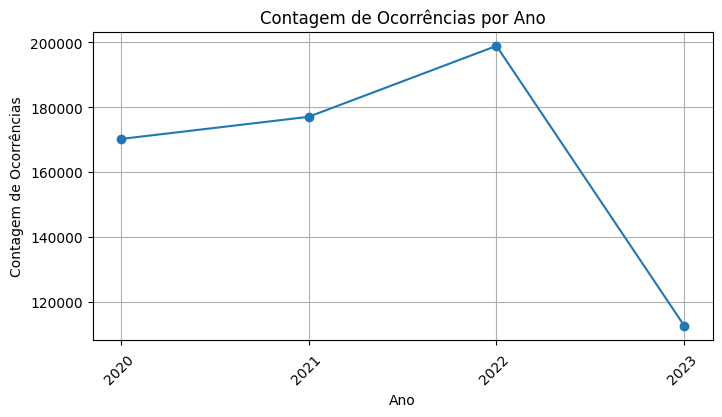

In [77]:
# Plot gráfico de linha 
plt.figure(figsize=(8, 4))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title("Contagem de Ocorrências por Ano")
plt.xlabel('Ano')
plt.ylabel('Contagem de Ocorrências')
plt.xticks(rotation=45)
plt.grid(True)
plt.show();

#### Como visto no gráfico acima, o ano com maior número de ocorrências registradas foi o de 2022 com 201.823 ocorrências. Lembrando que os registro de 2023 são até o mês de Julho.

### 🔸Período do Dia com Maior Número de Ocorrências Registradas

In [78]:
newdf['PERIOD OCC'].value_counts()

Tarde        212897
Manhã        204008
Noite        162770
Madrugada     78948
Name: PERIOD OCC, dtype: int64

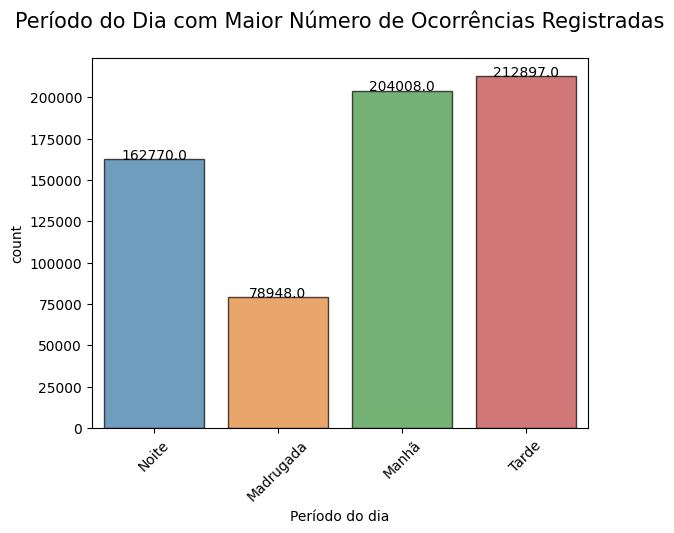

In [79]:
sns.countplot(data= newdf, x= 'PERIOD OCC', alpha = 0.7, edgecolor= 'black')
plt.xticks(rotation = 45)
ax= plt.gca()
plt.xlabel('Período do dia')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Período do Dia com Maior Número de Ocorrências Registradas\n", fontsize = 15)
plt.show();

#### O período do dia, dentre os anos de 2020 á 2023, com maior casos de ocorrência é o da Tarde com 212.897 registros.

### 🔸Região com Maior Número de Ocorrências Registradas

In [80]:
newdf['AREA NAME'].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire',
       'Northeast', 'Harbor', 'Van Nuys', 'West Valley', 'West LA',
       'Wilshire', 'Rampart', '77th Street', 'Hollenbeck', 'Southeast',
       'Pacific', 'Newton', 'Hollywood', 'Foothill', 'Olympic', 'Topanga'],
      dtype=object)

In [81]:
newdf['AREA NAME'].value_counts()

Central        47282
77th Street    40711
Pacific        38210
Hollywood      36852
Southwest      36796
Olympic        33471
Southeast      32786
N Hollywood    32712
Wilshire       32147
West LA        31982
Newton         31013
Rampart        30411
Van Nuys       28258
Northeast      28151
West Valley    28115
Topanga        27541
Devonshire     27098
Harbor         26154
Mission        24483
Hollenbeck     22970
Foothill       21480
Name: AREA NAME, dtype: int64

#### A região Central da Cidade tem o maior número de casos registrados.

### 🔸TOP 3 Crimes mais Cometidos

In [82]:
crime_counts = newdf['Crm Cd Desc'].value_counts()
top_crimes = crime_counts.nlargest(3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


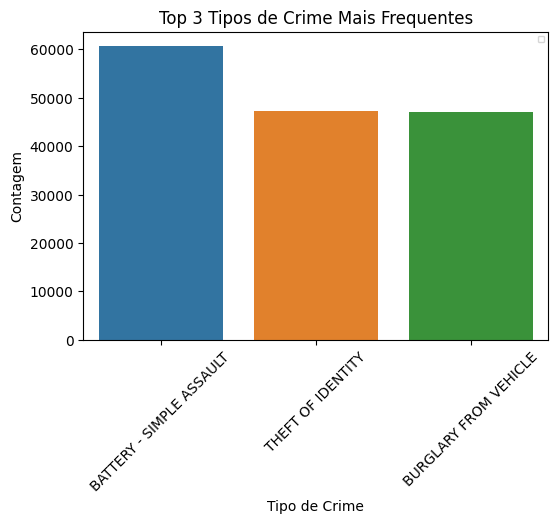

In [83]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_crimes.index, y=top_crimes.values)
plt.xlabel('Tipo de Crime')
plt.ylabel('Contagem')
plt.title('Top 3 Tipos de Crime Mais Frequentes')
plt.xticks(rotation=45)
plt.legend(fontsize= 'xx-small')
plt.show();

#### Os crimes com maior ocorrência registradas são os de: 
- 1: Assalto e agressão com lesão corporal/ ofensa corporal
- 2: Roubo de Identidade/ carteira
- 3: Roubo de Veículo

### 🔸Faixa Etária das Vítimas

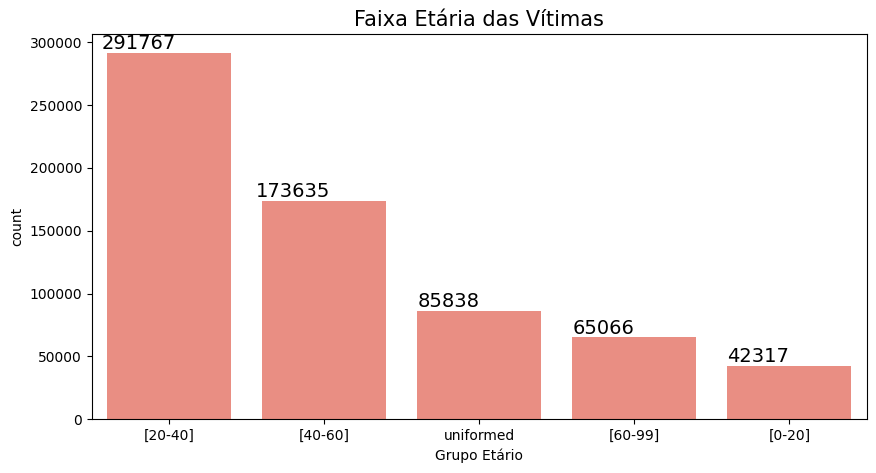

In [84]:
plt.figure(figsize = (10,5))
plt.subplot()
ax= sns.countplot(data=newdf, x='Age Group', order=newdf['Age Group'].value_counts().index, color='salmon')

plt.title("Faixa Etária das Vítimas", fontsize = 15)
plt.xlabel('Grupo Etário')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
plt.show()

#### A faixa Etária com maior ocorrência registradas foi a de 20 à 40 anos. 

### 🔸Local com Maior Registro de Ocorrências

In [85]:
newdf['Premis Desc'].value_counts().nlargest(3)

SINGLE FAMILY DWELLING                          127631
STREET                                          115644
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     93146
Name: Premis Desc, dtype: int64

#### Os tipos de estabelecimento/local com maior número de ocorrências registradas:
- Moradia Unifamiliar (casas singulares; não geminadas)
- Rua
- Apartamentos 

### 🔸Ocorrências Registradas por Sexo da Vítima

In [86]:
newdf['Vict Sex'].value_counts()

M          314005
F          279653
Unknown     64965
Name: Vict Sex, dtype: int64

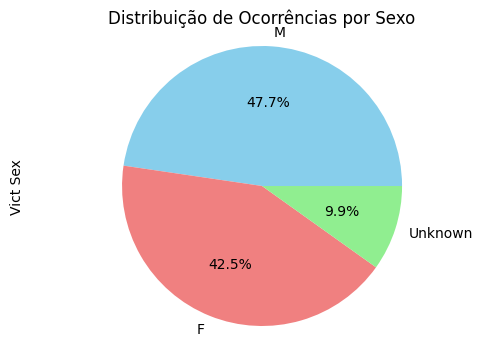

In [87]:
counts = newdf['Vict Sex'].value_counts()
colors = ['skyblue', 'lightcoral', 'lightgreen']
plt.figure(figsize=(6, 4))
counts.plot.pie(autopct='%1.1f%%', colors=colors)
plt.axis('equal') 
plt.title('Distribuição de Ocorrências por Sexo')
plt.show()

### Correlação de idade x sexo 

### 🔸TOP 3 Grupos de Vítimas por Descendência com Maior Ocorrências Registradas

In [88]:
newdf['Vict Descent'].value_counts().nlargest(3)

Hispanic/Latin/Mexican    232432
White                     155657
Black                     108486
Name: Vict Descent, dtype: int64

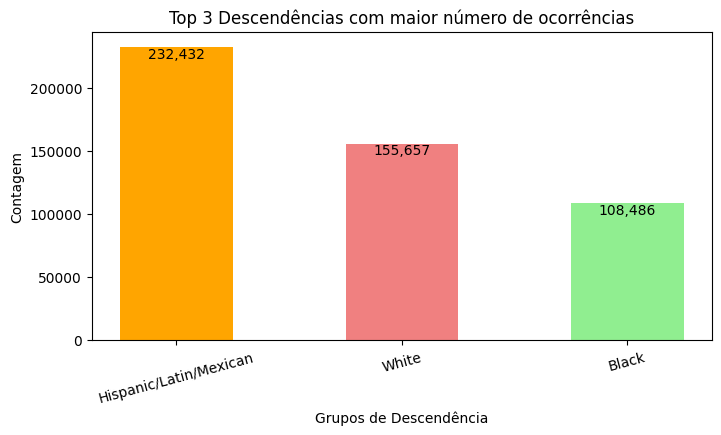

In [89]:
descents = ['Hispanic/Latin/Mexican', 'White', 'Black']
counts = [232432, 155657, 108486]

plt.figure(figsize=(8, 4))
bars = plt.bar(descents, counts, color=['orange', 'lightcoral', 'lightgreen'], width=0.5)

# Adicionar porcentagens acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:,}', va='bottom' if yval < 20000 else 'top', ha='center', fontsize=10)

plt.xlabel('Grupos de Descendência')
plt.ylabel('Contagem')
plt.title('Top 3 Descendências com maior número de ocorrências')
plt.xticks(rotation=15)

plt.show()

### 🔸TOP 5 Localizações com Maior Número de Registros 

In [90]:
newdf['LOCATION'].value_counts().nlargest(3)

800 N  ALAMEDA                      ST      1367
10200    SANTA MONICA                 BL    1188
7TH                                         1183
Name: LOCATION, dtype: int64

#### Com os dados acima podemos analisar os 3 endereços (que no dataset foi arredondado para quarteirão mais próximo para manter o anonimato) que tiveram os maiores números de registros nos últimos 3 anos em Los Angeles. 
- 800 N  ALAMEDA ST
- 10200 SANTA MONICA BL
- 7TH

## Conclusão


A análise dos dados de criminalidade na cidade de Los Angeles entre os anos de 2020 e 2023 revela uma visão valiosa das tendências e padrões que podem influenciar diversas áreas da sociedade.

Os dados analisamos podem servir como base para estudos de: 
- Segurança Pública e Policiamento: Os dados de criminalidade permitem uma compreensão detalhada das áreas da cidade que são mais suscetíveis a atividades criminosas podendo ajudar no trabalho de estudo da Prefeitura.
- Planejamento Urbano: Os dados podem ser usados para empresas no campo da construção ou imobiliário. 
- Empresas de Entrega e Serviços: A análise dos trabalhos desse tipo podem ter um papel crucial em tomadas de decição de empresas que trabalham com entrega, como por exemplo o Ifood, uber entre outras. As áreas de atendimento podem se mostrar perigosas para entregas de mercadorias, as empresas podem também usar essas estatísticas para monitorar seus serviços/ escolha da área de atendimento.
- Segurança dos Trabalhadores: Essa análise pode influenciar as políticas de segurança no trabalho, garantindo que os funcionários não estejam expostos a áreas de alta criminalidade durante suas atividades.
- Planejamento de Eventos e Atividades Públicas: As cidades, principalmente as maiores, possuem eventos culturais anuais e estudos de dados podem ser valiosos na hora do planejamento para encontrar os melhores locais. 
